# Statistics

## 1.1 Sales for the past week was the following amounts: [3505, 2400, 3027, 2798, 3700, 3250, 2689]. Without using library functions, what is the mean, variance, and standard deviation of of sales from last week? (for extra bonus points, write your own function that can calculate these two values for any sized list)

In [0]:
import pandas as pd
import numpy as np
sales = [3505,2400,3027,2798,3700,3250,2689]

In [0]:
# calculate mean
def mean(data):
  m = sum(data) / len(data)
  return m

# calculate variance using a list comprehension
def variance(data):
  m = sum(data) / len(data)
  vari = sum((xi - m) ** 2 for xi in data) / (len(data)-1)
  return vari

 #calculate Standard deviation
def stand_dev(data):
  m = sum(data) / len(data)
  variance = sum((xi - m) ** 2 for xi in data) / (len(data)-1)
  STD = variance**(1/2)
  return STD

In [27]:
print(mean(sales))
print(variance(sales))
print(stand_dev(sales))

3052.714285714286
214387.90476190473
463.0204150595357


In [31]:
#check
print(np.mean(sales))
print(np.var(sales,ddof=1))
print(np.std(sales,ddof=1))

3052.714285714286
214387.90476190473
463.0204150595357


## 1.2 Find the covariance between last week's sales numbers and the number of customers that entered the store last week: [127, 80, 105, 92, 120, 115, 93] (you may use librray functions for calculating the covariance since we didn't specifically talk about its formula)

In [0]:
customers = [127, 80, 105, 92, 120, 115, 93]

In [54]:
np.cov(sales,customers, ddof=1)

array([[214387.9047619 ,   7604.35714286],
       [  7604.35714286,    290.95238095]])

In [50]:
store = {"sales_week":sales, "customers_week":customers}

df = pd.DataFrame(store)

df.head(10)

,sales_week,customers_week
0,3505,127
1,2400,80
2,3027,105
3,2798,92
4,3700,120
5,3250,115
6,2689,93


In [51]:
df.cov()

,sales_week,customers_week
sales_week,214387.904762,7604.357143
customers_week,7604.357143,290.952381


## 1.3 Find the standard deviation of customers who entered the store last week. Then, use the standard deviations of both sales and customers to standardize the covariance to find the correlation coefficient that summarizes the relationship between sales and customers. (You may use library functions to check your work.)

In [44]:
#STD customers 
stand_dev(customers)

17.057326313123664

In [45]:
#STD sales
stand_dev(sales)

463.0204150595357

In [61]:
r = df.cov()/(stand_dev(customers)*stand_dev(sales))
r

,sales_week,customers_week
sales_week,27.144959,0.962834
customers_week,0.962834,0.036839


In [56]:
#check
df.corr()

,sales_week,customers_week
sales_week,1.000000,0.962834
customers_week,0.962834,1.000000


## 1.4 Use pandas to import a cleaned version of the titanic dataset from the following link: [Titanic Dataset](https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv)

## Calculate the variance-covariance matrix and correlation matrix for the titanic dataset's numeric columns. (you can encode some of the categorical variables and include them as a stretch goal if you finish early)

In [62]:
!wget https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv

--2019-10-15 20:49:05--  https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_clean.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 137509 (134K) [text/plain]
Saving to: ‘titanic_clean.csv’

titanic_clean.csv   100%[===================>] 134.29K  --.-KB/s    in 0.04s   

2019-10-15 20:49:05 (3.45 MB/s) - ‘titanic_clean.csv’ saved [137509/137509]



In [64]:
titanic = pd.read_csv('titanic_clean.csv')
titanic.head()

,Unnamed: 0,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,has_cabin_number
0,1,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",1
1,2,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,3,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,4,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,5,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


# Orthogonality

## 2.1 Plot two vectors that are orthogonal to each other. What is a synonym for orthogonal?

In [75]:
v1 = np.array([4,3])
v2 = np.array([-3,4])

np.vdot(v1,v2)
#perpendicular 

0

## 2.2 Are the following vectors orthogonal? Why or why not?

\begin{align}
a = \begin{bmatrix} -5 \\ 3 \\ 7 \end{bmatrix}
\qquad
b = \begin{bmatrix} 6 \\ -8 \\ 2 \end{bmatrix}
\end{align}

In [74]:
va = np.array([[-5],[3],[7]])
vb = np.array([[6],[-8],[2]])

np.vdot(va,vb)
#dot product does not equal 0 

-40

## 2.3 Compute the following values: What do these quantities have in common?

## What is $||c||^2$? 

## What is $c \cdot c$? 

## What is $c^{T}c$?

\begin{align}
c = \begin{bmatrix} 2 & -15 & 6 & 20 \end{bmatrix}
\end{align}

In [0]:
vc = np.array([2,-15,6,20])

In [83]:
(np.linalg.norm(vc))**2

665.0

In [78]:
np.vdot(vc,vc)

665

In [80]:
vcT = vc.T
np.vdot(vcT,vc)

665

# Unit Vectors

## 3.1 Using Latex, write the following vectors as a linear combination of scalars and unit vectors:

\begin{align}
d = \begin{bmatrix} 7 \\ 12 \end{bmatrix}
\qquad
e = \begin{bmatrix} 2 \\ 11 \\ -8  \end{bmatrix}
\end{align}



```
# This is formatted as code
```

Your text here

\begin{align} 
7  \begin{bmatrix} 1 \\ 0 \end{bmatrix} +
12 \begin{bmatrix} 0\\1 \end{bmatrix}=
7\hat{i}+12\hat{j}
\end{align}

\begin{align} 
2  \begin{bmatrix} 1 \\ 0 \\ 0 \end{bmatrix} +
11 \begin{bmatrix} 0\\1\\0 \end{bmatrix} +
8 \begin{bmatrix} 0\\0\\1 \end{bmatrix}=
2\hat{i}+11\hat{j}+8\hat{k}
\end{align}

## 3.2 Turn vector $f$ into a unit vector:

\begin{align}
f = \begin{bmatrix} 4 & 12 & 11 & 9 & 2 \end{bmatrix}
\end{align}

In [89]:
vf = np.array([4,12,11,9,2])
vfn = np.linalg.norm(vf)

unit = vf/vfn
unit

array([0.20908335, 0.62725005, 0.57497921, 0.47043754, 0.10454167])

# Linear Independence / Dependence 

## 4.1 Plot two vectors that are linearly dependent and two vectors that are linearly independent (bonus points if done in $\mathbb{R}^3$).

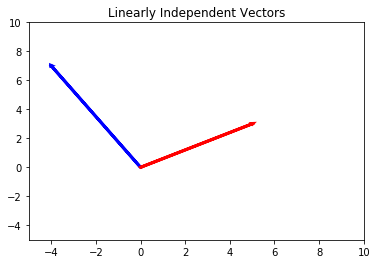

In [97]:
# Plot Linearly independent Vectors
import matplotlib.pyplot as plt

plt.xlim(-5,10)          
plt.ylim(-5,10)

#Vectors
a = [-4,7] #blue 
b = [5, 3] #red

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

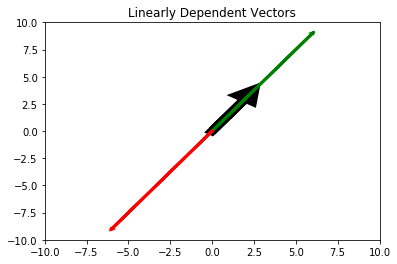

In [116]:
# Plot Linearly Dependent Vectors

plt.xlim(-10,10)          
plt.ylim(-10,10)

#Vector
c = [2,3] 

# Scaled Vectors
c2 = np.multiply(3, c)
c3 = np.multiply(-3,c)

# Get Vals
#axes = plt.gca()
#x_vals = np.array(axes.get_xlim())
#y_vals = 0*x_vals

# Plot Vectors and L
#plt.plot(x_vals, y_vals, '--', color='b', linewidth=1)
plt.arrow(0,0, c[0], c[1], linewidth=9, head_width=1, head_length=1, color ='black')
plt.arrow(0,0, c2[0], c2[1], linewidth=3, head_width=.05, head_length=0.05, color ='green')
plt.arrow(0,0, c3[0], c3[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Dependent Vectors")
plt.show()

# Span

## 5.1 What is the span of the following vectors?

\begin{align}
g = \begin{bmatrix} 1 & 2 \end{bmatrix}
\qquad
h = \begin{bmatrix} 4 & 8 \end{bmatrix}
\end{align}

In [117]:
#scalers 
#3 and 5

vg = np.array([1,2])
vh = np.array([4,8])

vgs = np.multiply(vg,3)
vhs = np.multiply(vh,5)

np.add(vgs,vhs)

array([23, 46])

## 5.2 What is the span of $\{l, m, n\}$?

\begin{align}
l = \begin{bmatrix} 1 & 2 & 3 \end{bmatrix}
\qquad
m = \begin{bmatrix} -1 & 0 & 7 \end{bmatrix}
\qquad
n = \begin{bmatrix} 4 & 8  & 2\end{bmatrix}
\end{align}

In [120]:
#scalers 
#3 and 5 and 2

vi = np.array([1,2,3])
vm = np.array([-1,0,7])
vn = np.array([4,8,2])

vis = np.multiply(vg,3)
vms = np.multiply(vh,5)
vns = np.multiply(vn,2)



TypeError: ignored

# Basis

## 6.1 Graph two vectors that form a basis for $\mathbb{R}^2$



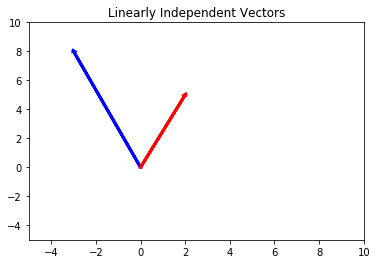

In [121]:

plt.xlim(-5,10)          
plt.ylim(-5,10)

#Vectors
a = [-3,8] #blue 
b = [2, 5] #red

# Plot Vectors
plt.arrow(0,0, a[0], a[1], linewidth=3, head_width=.05, head_length=0.05, color ='blue')
plt.arrow(0,0, b[0], b[1], linewidth=3, head_width=.05, head_length=0.05, color ='red')

plt.title("Linearly Independent Vectors")
plt.show()

## 6.2 What does it mean to form a basis?

A basis is a set of vectors that generates all elements of the vector space and the vectors in the set are linearly independent.

# Rank

## 7.1 What is the Rank of P?

\begin{align}
P = \begin{bmatrix} 
1 & 2 & 3 \\
 -1 & 0 & 7 \\
4 & 8  & 2
\end{bmatrix}
\end{align}

## 7.2 What does the rank of a matrix tell us?

# Linear Projections

## 8.1 Line $L$ is formed by all of the vectors that can be created by scaling vector $v$ 
\begin{align}
v = \begin{bmatrix} 1 & 3 \end{bmatrix}
\end{align}

\begin{align}
w = \begin{bmatrix} -1 & 2 \end{bmatrix}
\end{align}

## find $proj_{L}(w)$

## graph your projected vector to check your work (make sure your axis are square/even)

# Stretch Goal

## For vectors that begin at the origin, the coordinates of where the vector ends can be interpreted as regular data points. (See 3Blue1Brown videos about Spans, Basis, etc.)

## Write a function that can calculate the linear projection of each point (x,y) (vector) onto the line y=x. run the function and plot the original points in blue and the new projected points on the line y=x in red. 

## For extra points plot the orthogonal vectors as a dashed line from the original blue points to the projected red points.

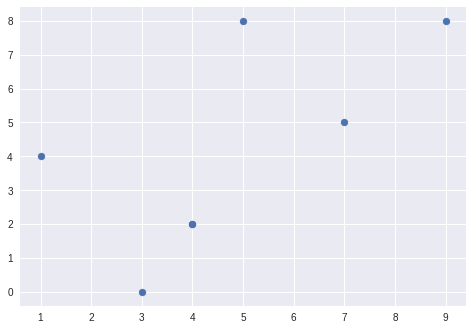

In [0]:
import pandas as pd
import matplotlib.pyplot as plt

# Creating a dataframe for you to work with -Feel free to not use the dataframe if you don't want to.
x_values = [1, 4, 7, 3, 9, 4, 5 ]
y_values = [4, 2, 5, 0, 8, 2, 8]

data = {"x": x_values, "y": y_values}

df = pd.DataFrame(data)

df.head()

plt.scatter(df.x, df.y)
plt.show()